In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [48]:
df_1 = pd.read_csv("UIDAI-2026/api_data_aadhar_enrolment/api_data_aadhar_enrolment_0_500000.csv")
df_2 = pd.read_csv("UIDAI-2026/api_data_aadhar_enrolment/api_data_aadhar_enrolment_500000_1000000.csv")
df_3 = pd.read_csv("UIDAI-2026/api_data_aadhar_enrolment/api_data_aadhar_enrolment_1000000_1006029.csv")


In [49]:
df = pd.concat([df_1, df_2, df_3], ignore_index=True)
df.columns

Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')

In [78]:
len(df['state'].unique())

36

In [50]:
def clean_state_names(df, state_col="state"):
    df = df.copy()

    # Step 1: basic string cleanup
    df[state_col] = (
        df[state_col]
        .astype(str)
        .str.strip()
        .str.replace(r"\s+", " ", regex=True)
        .str.title()
    )

    # Step 2: mapping of known variants to official names
    state_map = {
        # Odisha
        "Orissa": "Odisha",

        # Puducherry
        "Pondicherry": "Puducherry",

        # Delhi
        "Nct Of Delhi": "Delhi",

        # Telangana
        "Telengana": "Telangana",

        # Uttarakhand
        "Uttaranchal": "Uttarakhand",

        # Chhattisgarh
        "Chhatisgarh": "Chhattisgarh",
        "Chattisgarh": "Chhattisgarh",

        # Tamil Nadu
        "Tamilnadu": "Tamil Nadu",

        # West Bengal
        "Westbengal": "West Bengal",
        "West  Bengal": "West Bengal",
        "West Bangal": "West Bengal",

        # Jammu & Kashmir
        "Jammu & Kashmir": "Jammu And Kashmir",

        # Andaman & Nicobar
        "Andaman & Nicobar Islands": "Andaman And Nicobar Islands",

        # Dadra & Nagar Haveli and Daman & Diu (merged UT)
        "Daman And Diu": "Dadra And Nagar Haveli And Daman And Diu",
        "Daman & Diu": "Dadra And Nagar Haveli And Daman And Diu",
        "Dadra And Nagar Haveli": "Dadra And Nagar Haveli And Daman And Diu",
        "Dadra & Nagar Haveli": "Dadra And Nagar Haveli And Daman And Diu",
        "The Dadra And Nagar Haveli And Daman And Diu": "Dadra And Nagar Haveli And Daman And Diu",
    }

    # Step 3: apply mapping
    df[state_col] = df[state_col].replace(state_map)
    df =  df[~df[state_col].str.fullmatch(r"\d+")]
    return df


In [51]:
df = clean_state_names(df, "state")


In [52]:
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")
df["month"] = df["date"].dt.month_name() #type: ignore

In [53]:
df["month"].isna().sum()

np.int64(0)

In [54]:
df["month"].head(10)

0    March
1    March
2    March
3    March
4    March
5    March
6    March
7    March
8    March
9    March
Name: month, dtype: object

In [55]:
df = df.drop(columns=["date"])

In [56]:
df = df.rename(columns={
    "age_0_5": "children(0-5)",
    "age_5_17": "children(5-17)",
    "age_18_greater": "adults"
})


In [57]:
df = df[[
    "month",
    "state",
    "district",
    "pincode",
    "children(0-5)",
    "children(5-17)",
    "adults"
]]


In [58]:
df

,month,state,district,pincode,children(0-5),children(5-17),adults
0,March,Meghalaya,East Khasi Hills,793121,11,61,37
1,March,Karnataka,Bengaluru Urban,560043,14,33,39
2,March,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,March,Uttar Pradesh,Aligarh,202133,62,29,15
4,March,Karnataka,Bengaluru Urban,560016,14,16,21
...,...,...,...,...,...,...,...
1006024,December,West Bengal,West Midnapore,721149,2,0,0
1006025,December,West Bengal,West Midnapore,721150,2,2,0
1006026,December,West Bengal,West Midnapore,721305,0,1,0
1006027,December,West Bengal,West Midnapore,721504,1,0,0


In [59]:
df["child_total"] = df["children(0-5)"] + df["children(5-17)"]

In [60]:
df["total_enrolment"] = df["child_total"] + df["adults"]
df['child_total'].sum()


np.int64(5267348)

In [61]:
#pressure metric
df["child_share"] = df["child_total"] / df["total_enrolment"]
df

,month,state,district,pincode,children(0-5),children(5-17),adults,child_total,total_enrolment,child_share
0,March,Meghalaya,East Khasi Hills,793121,11,61,37,72,109,0.660550
1,March,Karnataka,Bengaluru Urban,560043,14,33,39,47,86,0.546512
2,March,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,111,123,0.902439
3,March,Uttar Pradesh,Aligarh,202133,62,29,15,91,106,0.858491
4,March,Karnataka,Bengaluru Urban,560016,14,16,21,30,51,0.588235
...,...,...,...,...,...,...,...,...,...,...
1006024,December,West Bengal,West Midnapore,721149,2,0,0,2,2,1.000000
1006025,December,West Bengal,West Midnapore,721150,2,2,0,4,4,1.000000
1006026,December,West Bengal,West Midnapore,721305,0,1,0,1,1,1.000000
1006027,December,West Bengal,West Midnapore,721504,1,0,0,1,1,1.000000


In [62]:
district_df = (
    df
    .groupby(["month","state","district"],as_index=False)
    .agg({
        "children(0-5)":"sum",
        "children(5-17)":"sum",
        "adults":"sum",
    })
)
district_df

,month,state,district,children(0-5),children(5-17),adults
0,April,Assam,Baksa,408,483,187
1,April,Assam,Barpeta,138,54,23
2,April,Assam,Biswanath,104,114,32
3,April,Assam,Bongaigaon,221,87,61
4,April,Assam,Cachar,988,461,299
...,...,...,...,...,...,...
4851,September,West Bengal,South Twenty Four Parganas,797,316,3
4852,September,West Bengal,Uttar Dinajpur,5458,2585,40
4853,September,West Bengal,West Midnapore,626,221,1
4854,September,West Bengal,hooghly,1,2,0


In [63]:
district_df["child_total"] = (
    district_df["children(0-5)"] + district_df["children(5-17)"]
)

district_df["total_enrolment"] = (
    district_df["child_total"] + district_df["adults"]
)

district_df["child_share"] = (
    district_df["child_total"] / district_df["total_enrolment"]
)
district_df['child_share']

0       0.826531
1       0.893023
2       0.872000
3       0.834688
4       0.828947
          ...   
4851    0.997312
4852    0.995051
4853    0.998821
4854    1.000000
4855    1.000000
Name: child_share, Length: 4856, dtype: float64

In [64]:
district_df["state_avg_child_share"] = (
    district_df
    .groupby(["month", "state"])["child_share"]
    .transform("mean")
)

In [65]:
month_order = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]

district_df["month"] = pd.Categorical(
    district_df["month"],
    categories=month_order,
    ordered=True
)

In [66]:
district_df.shape

(4856, 10)

In [67]:
#pressure_score
district_df["child_share"] = (
    district_df["child_total"] / district_df["total_enrolment"]
)
district_df["pressure_score"] = (
    district_df["child_share"] - district_df["state_avg_child_share"]
)

In [68]:
monthly_trend = (
    district_df
    .groupby("month")["child_total"]
    .sum()
    .reset_index()
)
monthly_trend['child_total'].sum()

C:\Users\palas\AppData\Local\Temp\ipykernel_25840\3642697089.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("month")["child_total"]


np.int64(5267348)

### Monthly Trend of Child Aadhaar Enrolments

This chart shows the overall monthly trend of child Aadhaar enrolments (ages 0–17) aggregated across all districts.
It helps establish a baseline understanding of how child enrolment activity varies over time before comparing individual districts against state-level patterns.

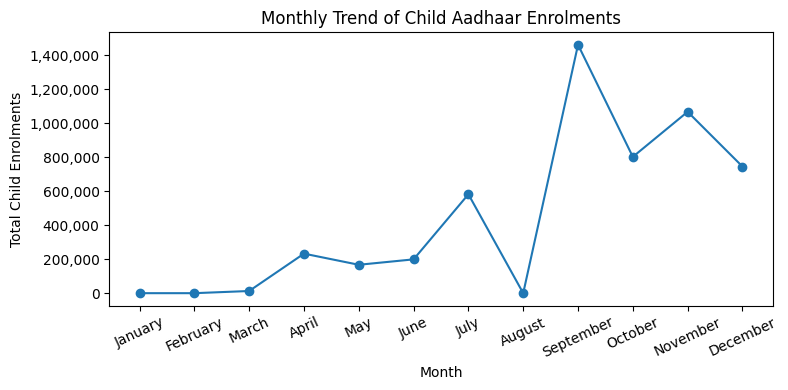

In [69]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(
    monthly_trend["month"],
    monthly_trend["child_total"],
    marker="o"
)

ax.set_xlabel("Month")
ax.set_ylabel("Total Child Enrolments")
ax.set_title("Monthly Trend of Child Aadhaar Enrolments")

ax.set_xticks(monthly_trend["month"])
plt.xticks(rotation=25)

ax.yaxis.set_major_formatter(
    ticker.StrMethodFormatter('{x:,.0f}')
)
plt.tight_layout()
plt.show()

**Observation:** Child enrolments show noticeable variation across months, indicating that enrolment activity is not uniformly distributed over time.

### District-wise Child Enrolment Share vs State Average (March)

This chart compares the child enrolment share of selected districts within a state against the state’s average for the same month.
It highlights districts where child enrolment activity deviates noticeably from the state-level pattern, forming the basis for the pressure score.


In [70]:
selected_state = "Uttar Pradesh"
selected_month = "March"

subset = district_df[(district_df['state']==selected_state) & 
                     (district_df['month']==selected_month)]

top_districts = (
    subset
    .sort_values("child_share",ascending=False)
    .head(10)
)
top_districts

,month,state,district,children(0-5),children(5-17),adults,child_total,total_enrolment,child_share,state_avg_child_share,pressure_score
1821,March,Uttar Pradesh,Saharanpur,91,152,10,243,253,0.960474,0.855363,0.105111
1808,March,Uttar Pradesh,Aligarh,226,353,44,579,623,0.929374,0.855363,0.074011
1813,March,Uttar Pradesh,Gautam Buddha Nagar,175,636,72,811,883,0.918460,0.855363,0.063097
1812,March,Uttar Pradesh,Firozabad,93,77,21,170,191,0.890052,0.855363,0.034689
1817,March,Uttar Pradesh,Kanpur Nagar,47,138,23,185,208,0.889423,0.855363,0.034060
1818,March,Uttar Pradesh,Lucknow,23,102,17,125,142,0.880282,0.855363,0.024918
1814,March,Uttar Pradesh,Ghaziabad,129,471,89,600,689,0.870827,0.855363,0.015464
1807,March,Uttar Pradesh,Agra,280,494,132,774,906,0.854305,0.855363,-0.001059
1816,March,Uttar Pradesh,Jaunpur,70,213,51,283,334,0.847305,0.855363,-0.008058
1822,March,Uttar Pradesh,Unnao,34,136,33,170,203,0.837438,0.855363,-0.017925


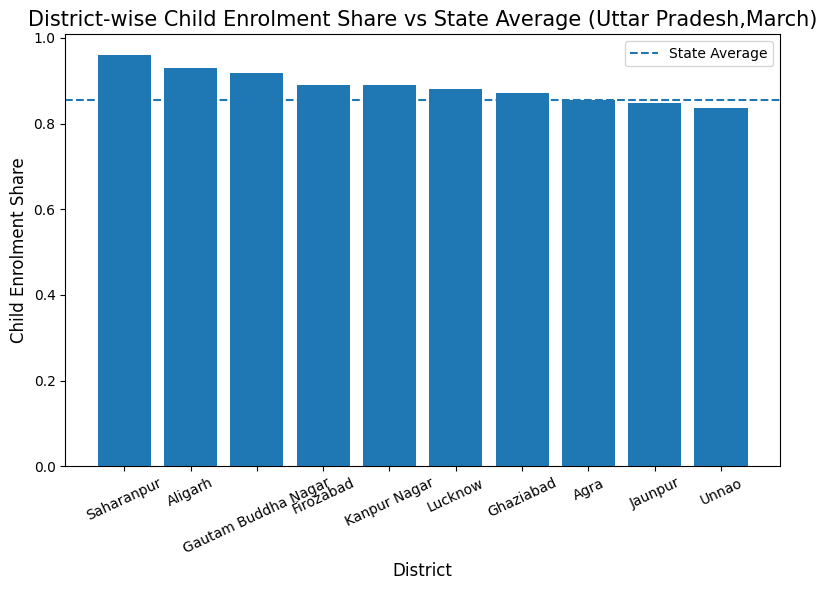

In [71]:
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(
    top_districts['district'],
    top_districts['child_share']
)

state_avg = top_districts["state_avg_child_share"].iloc[0]

ax.axhline(
    y = state_avg,
    linestyle="--",
    label="State Average"
)

ax.set_title(f"District-wise Child Enrolment Share vs State Average ({selected_state},{selected_month})",fontsize=15)
ax.set_xlabel("District",fontsize = 12)
ax.set_ylabel("Child Enrolment Share",fontsize=12)

plt.xticks(rotation=25)
ax.legend()

plt.tight_layout()
plt.show()

**Observation:** A small number of districts show noticeably higher child enrolment shares compared to the state average, indicating uneven distribution of enrolment activity.


### Top Districts by Child Enrolment Pressure Score (April)

This chart ranks districts based on their child enrolment pressure score for a selected month.
Higher pressure scores indicate districts where child enrolment share deviates most positively from the state average, highlighting regions that may warrant closer observation.


In [72]:
selected_month = "April"  # April
selected_state = "Uttar Pradesh"
month_df = district_df[(district_df["month"] == selected_month)&
                        (district_df['state']==selected_state)]
month_df.head()

,month,state,district,children(0-5),children(5-17),adults,child_total,total_enrolment,child_share,state_avg_child_share,pressure_score
210,April,Uttar Pradesh,Agra,832,568,37,1400,1437,0.974252,0.960066,0.014186
211,April,Uttar Pradesh,Aligarh,1066,643,58,1709,1767,0.967176,0.960066,0.007110
212,April,Uttar Pradesh,Ambedkar Nagar,159,143,10,302,312,0.967949,0.960066,0.007883
213,April,Uttar Pradesh,Amroha,434,135,11,569,580,0.981034,0.960066,0.020969
214,April,Uttar Pradesh,Azamgarh,231,332,26,563,589,0.955857,0.960066,-0.004209


In [73]:
top_pressure = (
    month_df
    .sort_values(
    "pressure_score", ascending=False
).head(10))
top_pressure

,month,state,district,children(0-5),children(5-17),adults,child_total,total_enrolment,child_share,state_avg_child_share,pressure_score
241,April,Uttar Pradesh,Moradabad,1519,510,15,2029,2044,0.992661,0.960066,0.032595
225,April,Uttar Pradesh,Etah,724,354,13,1078,1091,0.988084,0.960066,0.028018
245,April,Uttar Pradesh,Saharanpur,1499,533,29,2032,2061,0.985929,0.960066,0.025863
220,April,Uttar Pradesh,Bareilly,3176,1025,63,4201,4264,0.985225,0.960066,0.025159
244,April,Uttar Pradesh,Rampur,894,333,19,1227,1246,0.984751,0.960066,0.024685
240,April,Uttar Pradesh,Meerut,1370,650,33,2020,2053,0.983926,0.960066,0.023860
222,April,Uttar Pradesh,Budaun,480,267,13,747,760,0.982895,0.960066,0.022829
213,April,Uttar Pradesh,Amroha,434,135,11,569,580,0.981034,0.960066,0.020969
252,April,Uttar Pradesh,Unnao,937,547,30,1484,1514,0.980185,0.960066,0.020119
248,April,Uttar Pradesh,Shrawasti,207,307,11,514,525,0.979048,0.960066,0.018982


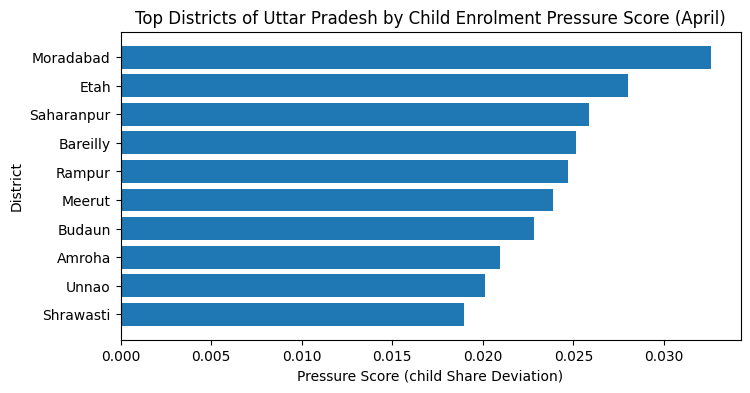

In [74]:
fig, ax = plt.subplots(figsize = (8,4))

ax.barh(
    top_pressure['district'],
    top_pressure['pressure_score']
)

ax.set_xlabel('Pressure Score (child Share Deviation)')
ax.set_ylabel('District')


ax.set_title(
    f"Top Districts of Uttar Pradesh by Child Enrolment Pressure Score (April)"
)

ax.invert_yaxis() #Highest on top


In [75]:
district_df.to_csv('district_pressure.csv',index=False)

In [76]:
df['state'].unique()

array(['Meghalaya', 'Karnataka', 'Uttar Pradesh', 'Bihar', 'Maharashtra',
       'Haryana', 'Rajasthan', 'Punjab', 'Delhi', 'Madhya Pradesh',
       'West Bengal', 'Assam', 'Uttarakhand', 'Gujarat', 'Andhra Pradesh',
       'Tamil Nadu', 'Chhattisgarh', 'Jharkhand', 'Nagaland', 'Manipur',
       'Telangana', 'Tripura', 'Mizoram', 'Jammu And Kashmir',
       'Chandigarh', 'Sikkim', 'Odisha', 'Kerala',
       'Dadra And Nagar Haveli And Daman And Diu', 'Arunachal Pradesh',
       'Himachal Pradesh', 'Goa', 'Ladakh', 'Andaman And Nicobar Islands',
       'Puducherry', 'Lakshadweep'], dtype=object)